In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib



from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report

# Load Dataset

In [3]:
df = pd.read_csv(r'C:\Users\User\Desktop\303\archive\taxi_trip_pricing.csv')

In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB
None
       Trip_Distance_km  Passenger_Count   Base_Fare  Per_Km_Rate  \
count        950.000000       950.000000  950.000000   950.000000   
mean          27.07054

In [21]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Trip_Distance_km         50
Time_of_Day               0
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Base_Fare                 0
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
Weather_Rain              0
Weather_Snow              0
dtype: int64


# Handling Missing Values

In [22]:
df.dropna(inplace=True)

In [23]:
X = df.drop("Trip_Price", axis=1)
y = df["Trip_Price"]

### Identify categorical and numerical columns

In [50]:
results = {}
for name, model in models.items():
    preds = train_and_evaluate(model, name)
    results[name] = preds



Linear Regression:
MAE: 9.75
MSE: 203.63
RMSE: 14.27
R2 Score: 0.89

Lasso Regression:
MAE: 9.69
MSE: 200.92
RMSE: 14.17
R2 Score: 0.89

Ridge Regression:
MAE: 9.73
MSE: 203.46
RMSE: 14.26
R2 Score: 0.89

Random Forest:
MAE: 4.62
MSE: 81.94
RMSE: 9.05
R2 Score: 0.96


In [35]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

### Preprocessing pipelines

In [31]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [33]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### Split the data

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the train data; transform the test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


## Define models

In [38]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

## Train and evaluate function

In [39]:
def train_and_evaluate(model, name):
    model.fit(X_train_processed, y_train)
    preds = model.predict(X_test_processed)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    print(f"\n{name}:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    return preds

## Run all models

In [40]:
results = {}
for name, model in models.items():
    preds = train_and_evaluate(model, name)
    results[name] = preds



Linear Regression:
MAE: 9.75
MSE: 203.63
RMSE: 14.27
R2 Score: 0.89

Lasso Regression:
MAE: 9.69
MSE: 200.92
RMSE: 14.17
R2 Score: 0.89

Ridge Regression:
MAE: 9.73
MSE: 203.46
RMSE: 14.26
R2 Score: 0.89

Random Forest:
MAE: 4.62
MSE: 81.94
RMSE: 9.05
R2 Score: 0.96


## Visualize residuals

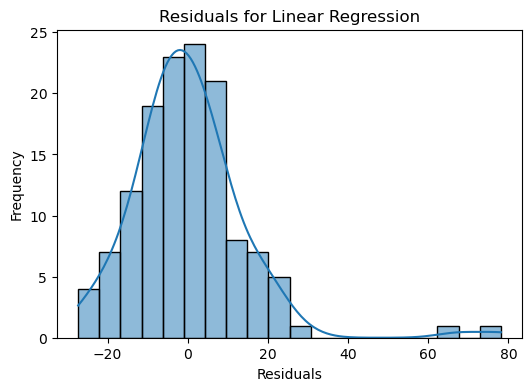

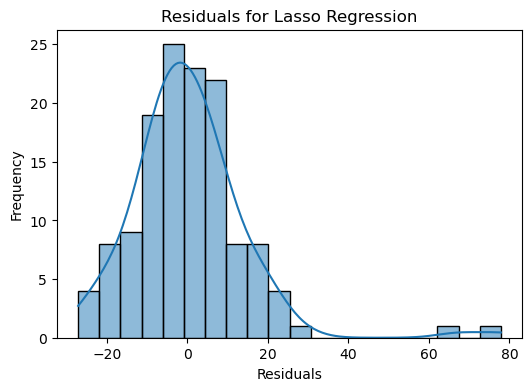

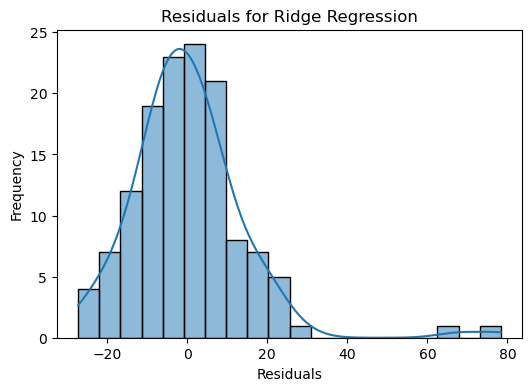

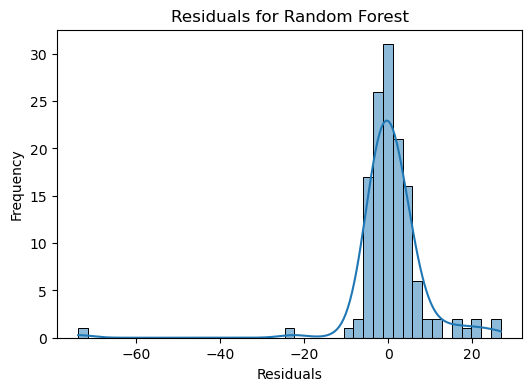

In [41]:
for name, preds in results.items():
    residuals = y_test - preds
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, kde=True)
    plt.title(f"Residuals for {name}")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()


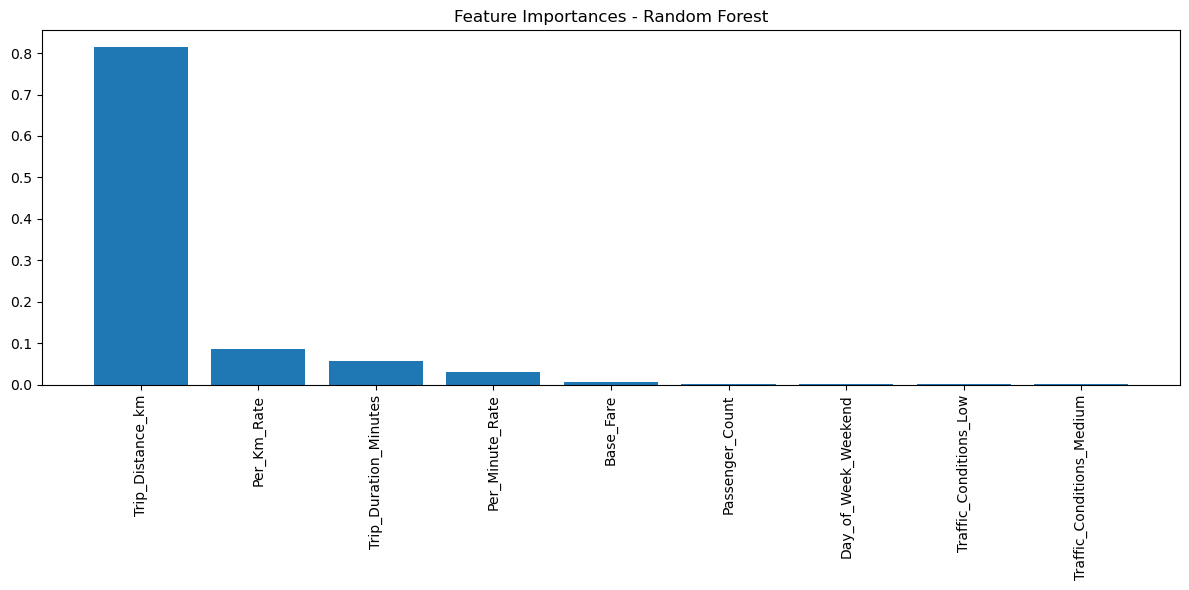

In [42]:
rf_model = models['Random Forest']
features = numerical_cols + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [43]:
y_class = pd.cut(y, bins=[-1,10,20,np.inf], labels=['Low', 'Medium', 'High'])
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_class, test_size=0.2, random_state=42)


In [44]:
X_train_clf_processed = preprocessor.fit_transform(X_train_clf)
X_test_clf_processed = preprocessor.transform(X_test_clf)


In [45]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_clf_processed, y_train_clf)
y_pred_clf = log_model.predict(X_test_clf_processed)

In [46]:

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_clf, y_pred_clf))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

        High       0.97      1.00      0.98       123
         Low       0.00      0.00      0.00         2
      Medium       0.60      0.38      0.46         8

    accuracy                           0.95       133
   macro avg       0.52      0.46      0.48       133
weighted avg       0.93      0.95      0.94       133



## Logistic

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       0.75      1.00      0.86         3
           2       0.00      0.00      0.00         1

    accuracy                           0.99       133
   macro avg       0.58      0.67      0.62       133
weighted avg       0.99      0.99      0.99       133

Accuracy Score: 0.9924812030075187


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


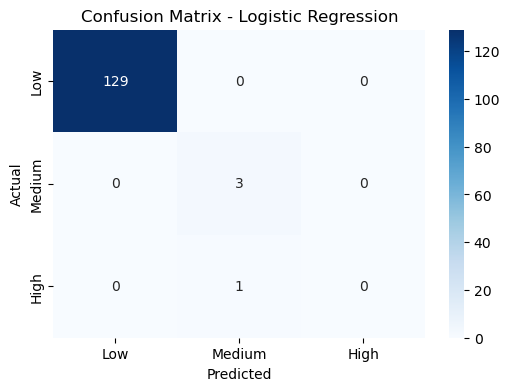

In [49]:
def fare_category(price):
    if price <= 150:
        return 0  # Low Fare
    elif price <= 300:
        return 1  # Medium Fare
    else:
        return 2  # High Fare

df['Fare_Category'] = df['Trip_Price'].apply(fare_category)
# Drop target columns
X_classification = df.drop(['Trip_Price', 'Fare_Category'], axis=1)

# One-hot encode categorical columns
X_classification = pd.get_dummies(X_classification, drop_first=True)
y_classification = df['Fare_Category']
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_classification)

# Train-test split
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)

# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_c, y_train_c)

# Predictions and evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred_c = log_model.predict(X_test_c)

print("Classification Report:")
print(classification_report(y_test_c, y_pred_c))
print("Accuracy Score:", accuracy_score(y_test_c, y_pred_c))

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
